In [40]:
import numpy as np #Importing the relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [41]:
dataset = pd.read_csv('position-salaries data.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [42]:
dataset.shape

(10, 3)

In [43]:
dataset.describe() #Visualisation of Mean and Percentiles of the Dataset.

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [44]:
X = dataset.iloc[:, dataset.columns == 'Level'].values # Separting X and Y
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [45]:
Y = dataset.iloc[:, dataset.columns == 'Salary'].values
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

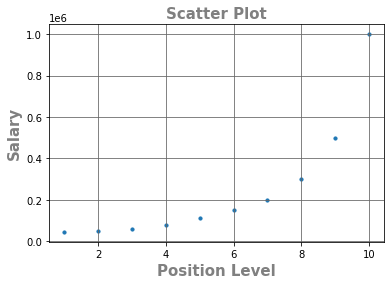

In [46]:
plt.scatter(X, Y, s=10) #Spread of values 
plt.title('Scatter Plot', fontweight='bold', fontsize='15', color='gray')
plt.xlabel('Position Level', fontweight='bold', fontsize='15', color='gray')
plt.ylabel('Salary', fontweight='bold', fontsize='15', color='gray')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

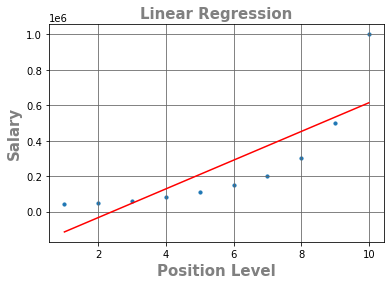

The R2 score for this model is 0.6690412331929895


In [47]:
#Applying Linear Regression to the same DataSet
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X, Y)
Y_pred_linear = model_linear.predict(X)

plt.scatter(X, Y, s=10)
plt.title('Linear Regression', fontweight='bold', fontsize='15', color='gray')
plt.plot(X, Y_pred_linear, color='r') # Making Linear Line through data for evaluation
plt.xlabel('Position Level', fontweight='bold', fontsize='15', color='gray')
plt.ylabel('Salary', fontweight='bold', fontsize='15', color='gray')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()
print("The R2 score for this model is", r2_score(Y,Y_pred_linear))

In [63]:
from sklearn.preprocessing import PolynomialFeatures
degree = int(input('Enter Degree: \n'))
def create_polynomial_regression_model(degree):
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, Y)
    X_poly = poly_reg.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, Y)
    
    plt.scatter(X, Y, color='red')
    plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Polynomial Regression', fontweight='bold', fontsize='15', color='gray')
    plt.xlabel('Position Level', fontweight='bold', fontsize='15', color='gray')
    plt.ylabel('Salary', fontweight='bold', fontsize='15', color='gray')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.show()
    return

Enter Degree: 
4


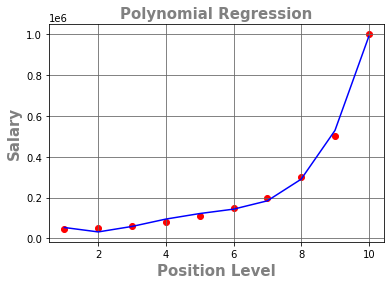

In [64]:
create_polynomial_regression_model(degree)

NameError: name 'lin_reg_2' is not defined

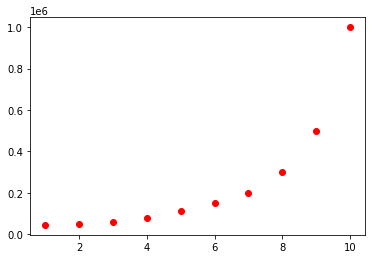

In [66]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression (Smoother Curve)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

entry_degree = int(input('Enter Degree: \n'))
polynomial_features = PolynomialFeatures(entry_degree)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, Y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y, y_poly_pred))
r2 = r2_score(Y, y_poly_pred)
print('The RMSE of the polynomial regression is: ',rmse)
print('The R2 of the polynomial regression is: ',r2)


Enter Degree: 
4
The RMSE of the polynomial regression is:  14503.234909626832
The R2 of the polynomial regression is:  0.9973922891706614
